In [62]:
# Load libraries
import pandas as pd
import numpy as np # working with arrays
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import DecisionTreeClassifier as dtc # tree algorithm
from sklearn.metrics import accuracy_score # model precision

In [63]:

import matplotlib.pyplot as plt # visualization
from matplotlib import rcParams # figure size
from termcolor import colored as cl # text customization
rcParams['figure.figsize'] = (5, 5)

In [64]:
df = pd.read_csv('E:\prog lang\proj ml\ml 2\Heart Attack Data Set.csv')

# print(cl(df.head(), attrs = ['bold']))

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Mohamed\AppData\Local\Temp\ipykernel_30896\1399355619.py:1: SyntaxWarning: invalid escape sequence '\p'
  df = pd.read_csv('E:\prog lang\proj ml\ml 2\Heart Attack Data Set.csv')


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [66]:
x_var = df.iloc[:, [0, 1,2, 3, 4, 5, 6, 7, 8,11, 12]].values  
y_var = df.iloc[:, 13].values  # Select 'target'

# print(cl('X variable samples : {}'.format(x_var[:5]), attrs = ['bold']))
# print(cl('Y variable samples : {}'.format(y_var[:5]), attrs = ['bold']))


In [67]:
x_train, x_test, y_train, y_test = train_test_split(x_var, y_var, test_size = 0.2, random_state = 0)

print(cl('X_train shape : {}'.format(x_train.shape), attrs = ['bold'] ))
print(cl('X_test shape : {}'.format(x_test.shape), attrs = ['bold']))
print(cl('y_train shape : {}'.format(y_train.shape), attrs = ['bold']))
print(cl('y_test shape : {}'.format(y_test.shape), attrs = ['bold']))

X_train shape : (242, 11)
X_test shape : (61, 11)
y_train shape : (242,)
y_test shape : (61,)


In [ ]:
# model = dtc(criterion = 'entropy', max_depth =2)
model = dtc(criterion = 'gini', max_depth =4    ) #<< what's the different 
model.fit(x_train, y_train)
pred_train=model.predict(x_train)
pred_model = model.predict(x_test)

# print(cl('Accuracy of the model is {:.0%}'.format(accuracy_score(y_test, pred_model)), attrs = ['bold']))
result=accuracy_score(y_test, pred_model)
print(result)

0.7704918032786885


In [69]:
#Importing the accuracy metric from sklearn.metrics library

from sklearn.metrics import accuracy_score

print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=model.predict(x_train)))
print('Accuracy Score on the test data: ', accuracy_score(y_true=y_test, y_pred=model.predict(x_test)))

Accuracy Score on train data:  1.0
Accuracy Score on the test data:  0.7704918032786885


[[20  7]
 [ 7 27]]


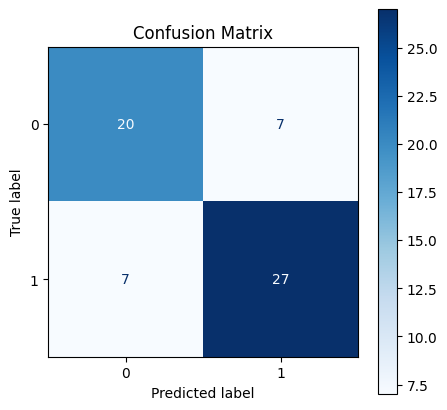

In [70]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm= confusion_matrix(y_test,y_pred=model.predict(x_test))
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [71]:
#Creating the Confusion matrix  0
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred=model.predict(x_test))
print(cr)

              precision    recall  f1-score   support

           0       0.74      0.74      0.74        27
           1       0.79      0.79      0.79        34

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



Score = 0.767429193899782


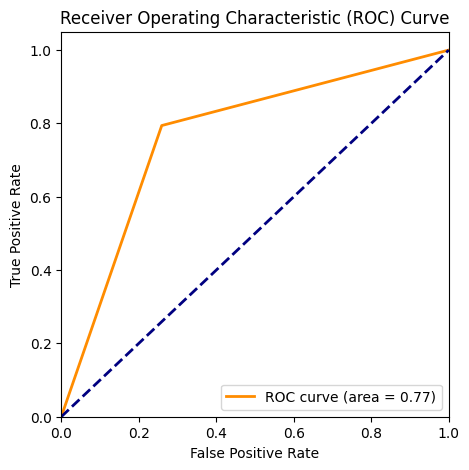

In [72]:

from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities (second column for binary classification)
y_pred_proba = model.predict_proba(x_test)[:, 1]  # For binary classification

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'Score = {roc_auc}')

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc_value = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_value:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


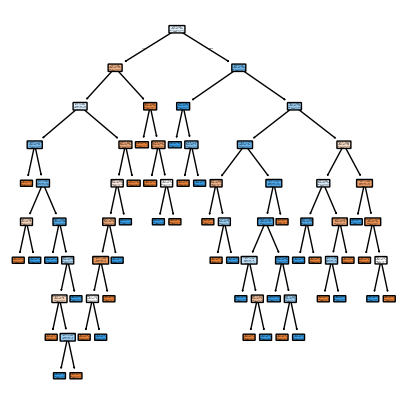

In [73]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it has 14 columns
# Select all relevant feature columns (adjust indices if needed)
feature_names = df.columns[[0, 1, 2, 3, 4, 5, 6, 7, 8, 11, 12]].tolist()  # Convert to list
# or if you are sure you want to use all columns except the target, you can do:
# feature_names = df.columns.drop(df.columns[13]).tolist()

# Convert target_names to strings
target_names = [str(name) for name in df.iloc[:, 13].unique().tolist()] #Converting the target_names to a list of strings

plot_tree(model,
          feature_names=feature_names,
          class_names=target_names,
          filled=True,
          rounded=True)

plt.savefig('tree_visualization.png')